## Train NER with Spacy v3 📣

##### Author : Deepak John Reji

This Notebook details on te steps to train your Custom NER using new spacy format 
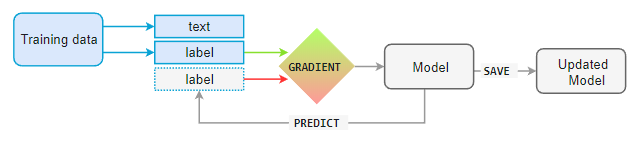

#### Step-1 : Creation of Training Data

#### Annotate your data

https://prodi.gy/docs/named-entity-recognition

In [ ]:
TRAIN_DATA = [('The F15 aircraft uses a lot of fuel', {'entities': [(4, 7, 'aircraft')]}),
 ('did you see the F16 landing?', {'entities': [(16, 19, 'aircraft')]}),
 ('how many missiles can a F35 carry', {'entities': [(24, 27, 'aircraft')]}),
 ('is the F15 outdated', {'entities': [(7, 10, 'aircraft')]}),
 ('does the US still train pilots to dog fight?',
  {'entities': [(0, 0, 'aircraft')]}),
 ('how long does it take to train a F16 pilot',
  {'entities': [(33, 36, 'aircraft')]}),
 ('how much does a F35 cost', {'entities': [(16, 19, 'aircraft')]}),
 ('would it be possible to steal a F15', {'entities': [(32, 35, 'aircraft')]}),
 ('who manufactures the F16', {'entities': [(21, 24, 'aircraft')]}),
 ('how many countries have bought the F35',
  {'entities': [(35, 38, 'aircraft')]}),
 ('is the F35 a waste of money', {'entities': [(7, 10, 'aircraft')]})]

#### Step-2 : Conversion of Data to .spacy format

In [ ]:
import pandas as pd
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

nlp = spacy.blank("en") # load a new spacy model
#nlp = spacy.load("en_core_web_sm") # load a new spacy model

db = DocBin() # create a DocBin object

for text, annot in tqdm(TRAIN_DATA): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)

db.to_disk("./train.spacy") # save the docbin object